<a href="https://www.kaggle.com/code/soumyadipbhat/spaceship-titanic-solved-notebook-detailed?scriptVersionId=140482897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spaceship Titanic Competition Solved Notebook:
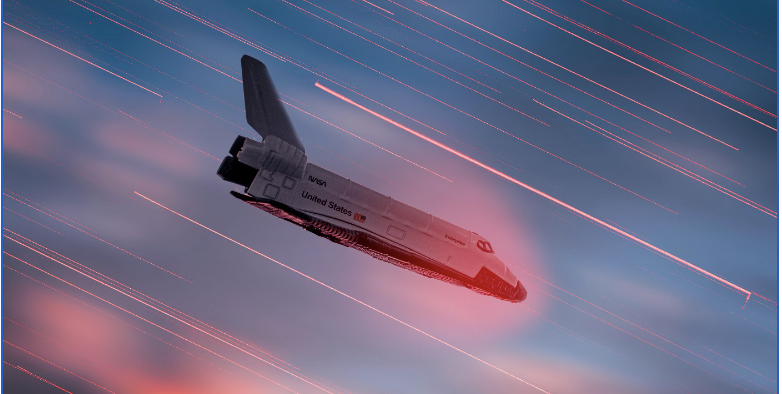
## Solving the Spaceship Titanic problem with Basic Tree based algorithm:
✅ This notebook includes concepts such as -
- Exploratory Data analysis
- Mapping of categorical values
- Feature engineering
- null value imputation
- Standardization
- hyperparameter tuning using `GridSearchCV`

👉 This notebook covers the whole process from starting to the end.
👉 If you like it please **Upvote**, it'll motivate me a lot.
and if you have any comments on my code, any suggestions or any mistake you found, let me know.

🔗 My Github: https://github.com/SoumyaCO

In [1]:
# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Loading the training data.
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.shape

(8693, 14)

## Workflow:
* <font color="orange">**Data Preparation**</font>
    * Mean, Median, Variation in features
    * Missing values
    * Label encode categorical features or make them columns with binary (True/False) values
    * Relation and relevance of the feature
    * Impute missing values
    * dimensionality reduction
    * Scaling the data [choose method according to the density distribution]
***
* <font color="orange">**Training Model and optimization:**</font>
    * Train models [linear, knn, tree based model]
    * Perform grid search to optimize the hyperparameter

In [5]:
# General Information about the data [dtype, non-null values, memory-size]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Checking for number of null data columns
train_data.isnull().sum(axis = 0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
# Statistical information about the data. [Mean, max, min, std values]
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


We can see many columns are not shown here, because the `describe()` methods only considers the numerical valued columns.
***
## Data Cleaning:

In [8]:
# Dropping the passengerId and Name as they are not relevant for the prediction
train_data.drop(['Name', 'PassengerId'], inplace = True, axis = 1)
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### Map the categorical values.

In [9]:
train_data.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
train_data['HomePlanet'] = train_data['HomePlanet'].map({'Europa': 1,
                                           'Earth': 2,
                                           'Mars': 3})
train_data.HomePlanet[:10]

0    1.0
1    2.0
2    1.0
3    1.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    1.0
Name: HomePlanet, dtype: float64

In [11]:
train_data.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [12]:
# Map Destination column:
train_data.Destination = train_data.Destination.map({'TRAPPIST-1e': 1,
                                                     '55 Cancri e': 2,
                                                     'PSO J318.5-22': 3})
train_data.Destination[:10]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    3.0
6    1.0
7    1.0
8    1.0
9    2.0
Name: Destination, dtype: float64

In [13]:
# Now for the Cabin:
clean_cabin = train_data['Cabin'].str.split('/', expand = True)
clean_cabin.columns = ["Deck", "Cabin_Number", "Cabin_Position"]
clean_cabin

,Deck,Cabin_Number,Cabin_Position
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [14]:
train_data = pd.concat([train_data, clean_cabin], axis = 1)
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_Number,Cabin_Position
0,1.0,False,B/0/P,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,2.0,False,F/0/S,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,1.0,False,A/0/S,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,1.0,False,A/0/S,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,2.0,False,F/1/S,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [15]:
# Now we can drop the original 'Cabin' column:
train_data.drop('Cabin', axis = 1, inplace = True)

In [16]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_Number,Cabin_Position
0,1.0,False,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,2.0,False,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,1.0,False,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,1.0,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,2.0,False,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [17]:
decks = pd.get_dummies(train_data.Deck, drop_first=True)
Cabin_positions = pd.get_dummies(train_data.Cabin_Position, drop_first=True)

In [18]:
# Concat these DFs
train_data = pd.concat([train_data, decks, Cabin_positions], axis = 1)
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Number,Cabin_Position,B,C,D,E,F,G,T,S
0,1.0,False,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,P,1,0,0,0,0,0,0,0
1,2.0,False,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,S,0,0,0,0,1,0,0,1
2,1.0,False,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,S,0,0,0,0,0,0,0,1
3,1.0,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,S,0,0,0,0,0,0,0,1
4,2.0,False,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,S,0,0,0,0,1,0,0,1


In [19]:
# Now drop the Deck and Cabin Positions:
train_data.drop(['Deck', 'Cabin_Position'], axis = 1, inplace = True)
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Number,B,C,D,E,F,G,T,S
0,1.0,False,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,0,0,0,0
1,2.0,False,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0,1,0,0,1
2,1.0,False,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,0,0,0,0,0,1
3,1.0,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,0,0,0,0,0,1
4,2.0,False,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1,0,0,1


<Axes: >

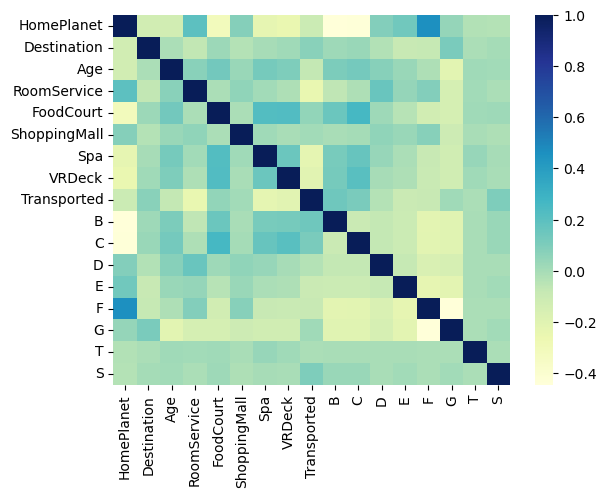

In [20]:
# Visualise Correlation:
sns.heatmap(train_data.corr(), cmap='YlGnBu', annot = False)

In [21]:
# Now fill the missing values: 
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
train_data['VIP'] = train_data['VIP'].fillna(train_data['VIP'].mode()[0])
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].mean())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean())
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].mean())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())
train_data['Cabin_Number'] = train_data['Cabin_Number'].fillna(train_data['Cabin_Number'].mode()[0])
train_data['B'] = train_data['B'].fillna(train_data['B'].mode())
train_data['C'] = train_data['C'].fillna(train_data['C'].mode())
train_data['D'] = train_data['D'].fillna(train_data['D'].mode())
train_data['E'] = train_data['E'].fillna(train_data['E'].mode())
train_data['F'] = train_data['F'].fillna(train_data['F'].mode())
train_data['G'] = train_data['G'].fillna(train_data['G'].mode())
train_data['T'] = train_data['T'].fillna(train_data['T'].mode())
train_data['S'] = train_data['S'].fillna(train_data['S'].mode())

In [22]:
# Making the feature value int/float type:
train_data['Cabin_Number'] = train_data['Cabin_Number'].astype(int)
train_data['RoomService'] = train_data['RoomService'].astype(int)
train_data['FoodCourt'] = train_data['FoodCourt'].astype(int)
train_data['ShoppingMall'] = train_data['ShoppingMall'].astype(int)
train_data['Spa'] = train_data['Spa'].astype(int)
train_data['VRDeck'] = train_data['VRDeck'].astype(int)

In [23]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_Number    0
B               0
C               0
D               0
E               0
F               0
G               0
T               0
S               0
dtype: int64

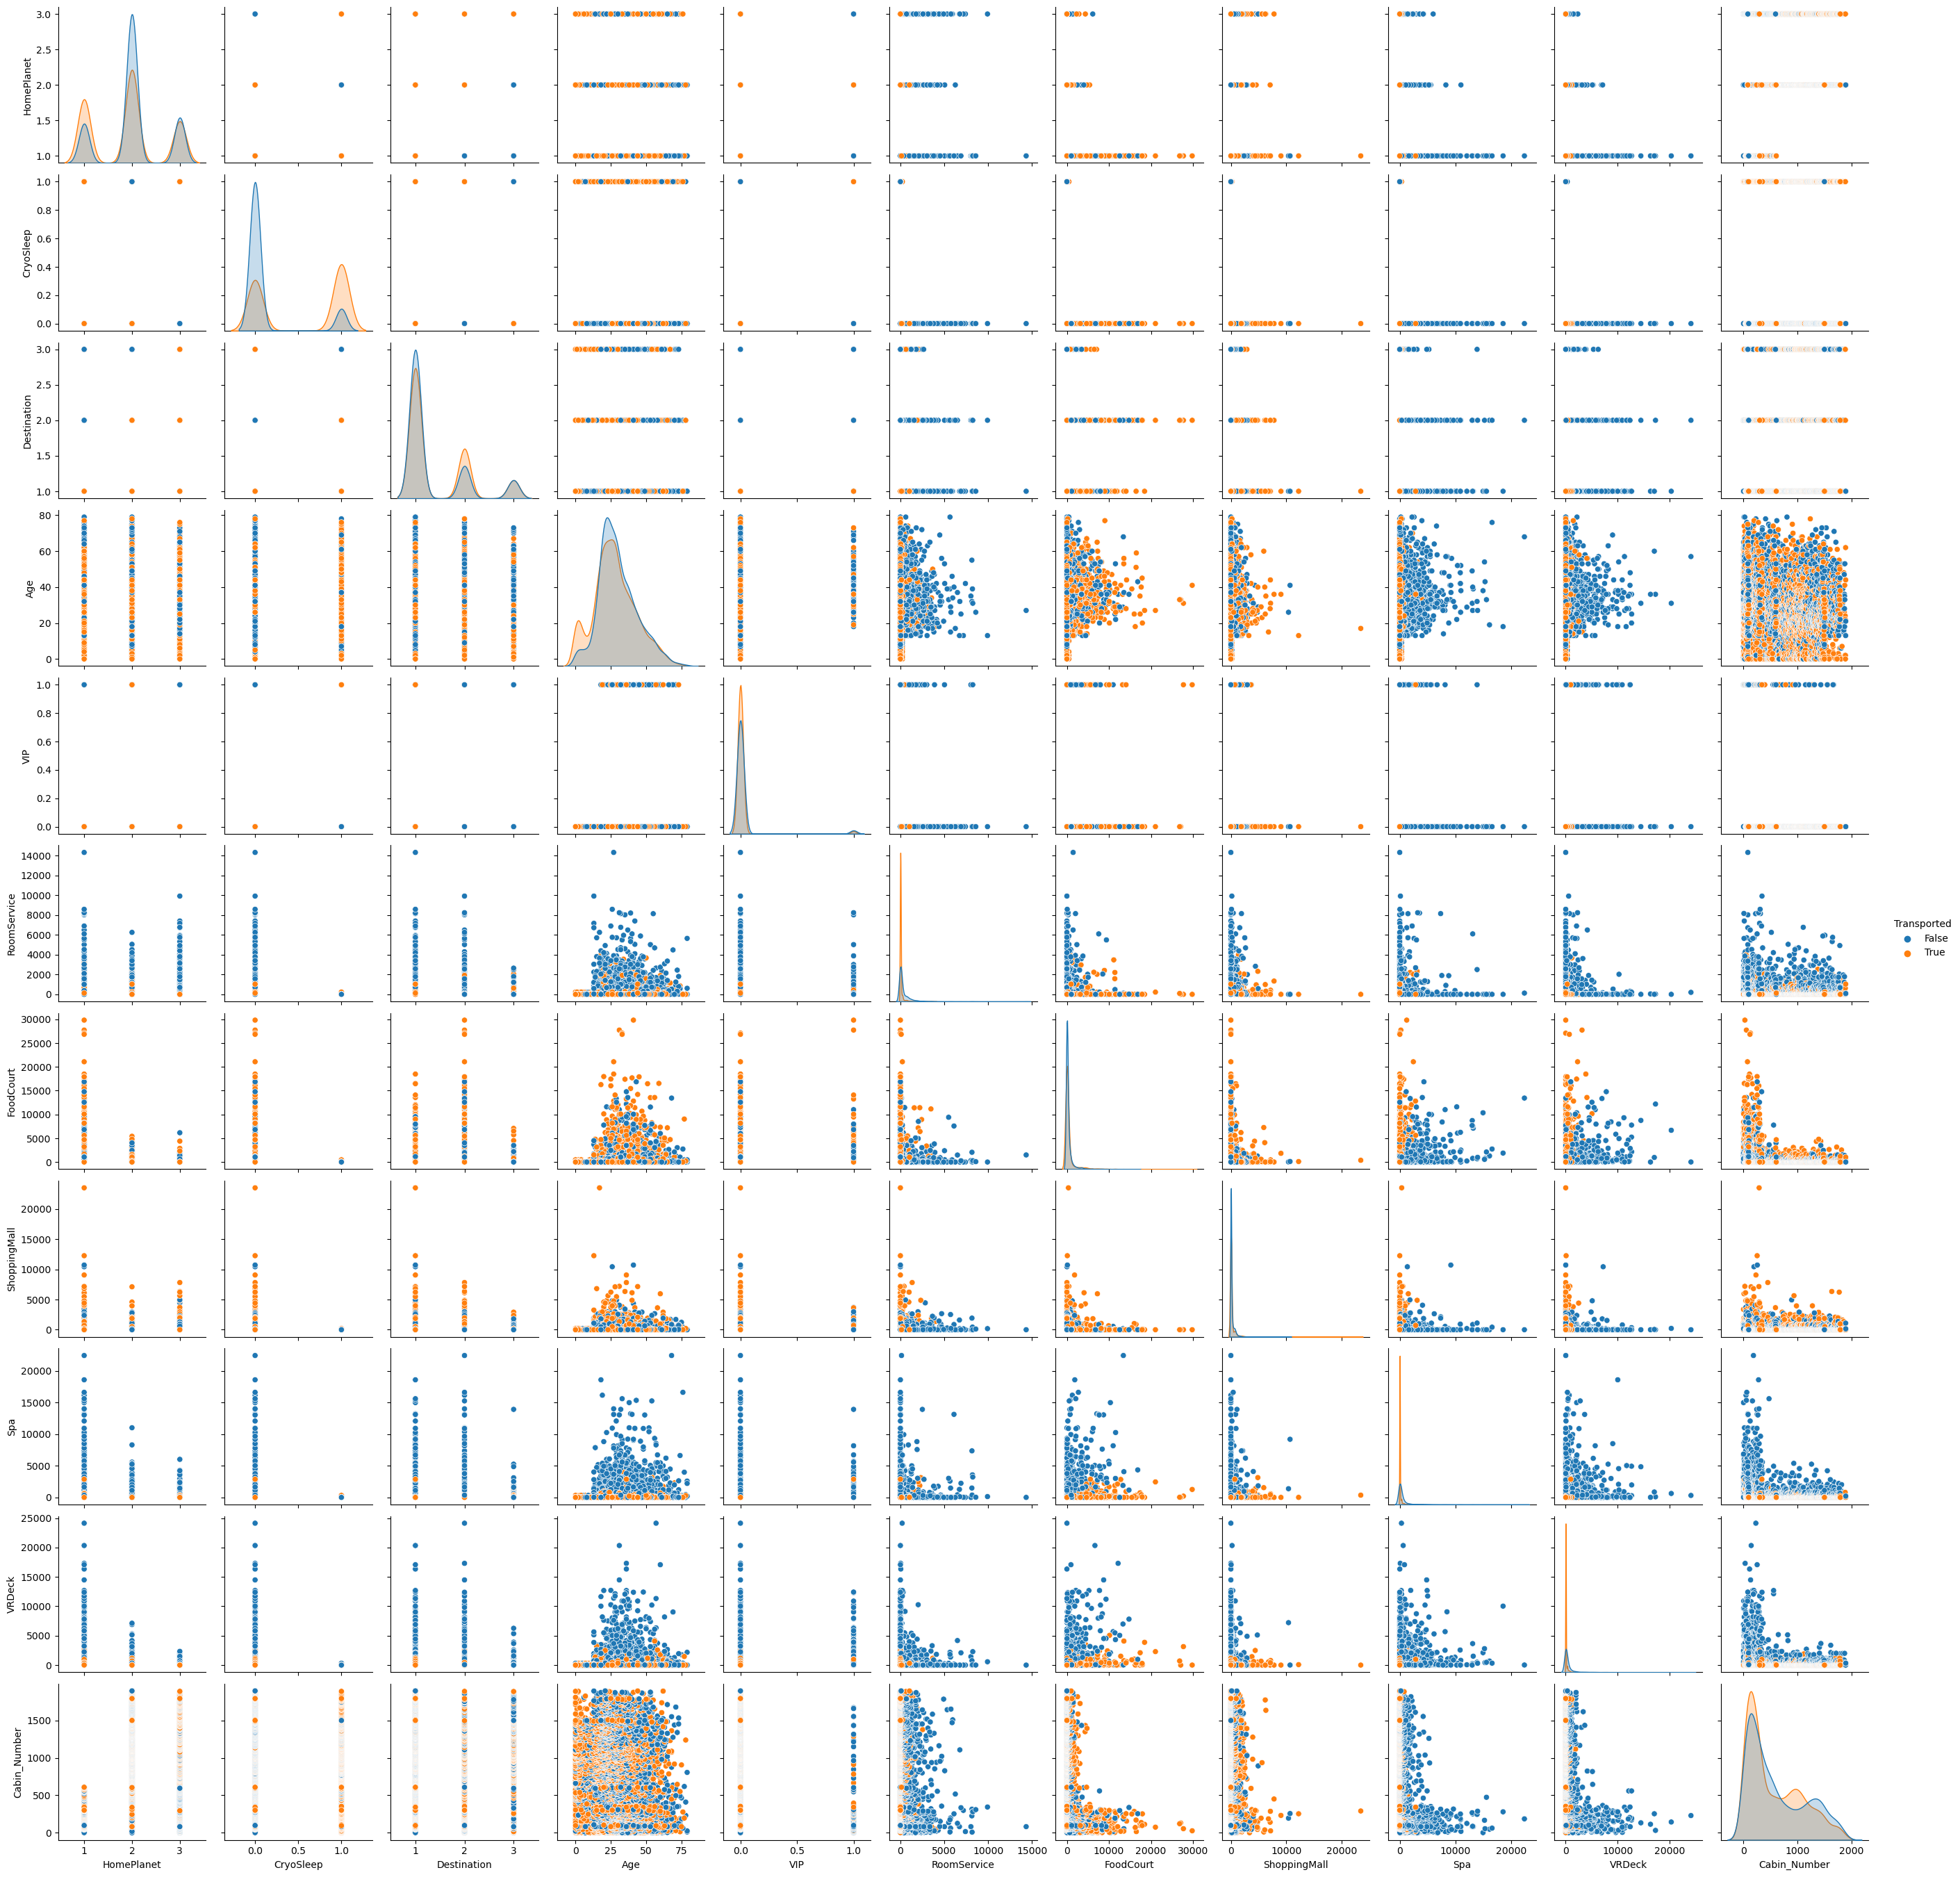

In [24]:
# Pairplot # This cell will take time. You can comment it to avoid extra cpu/gpu time.
sns.pairplot(train_data.iloc[:, :12], hue = 'Transported')

## Data Scaling [Continuous Numerical data]

<Axes: ylabel='Density'>

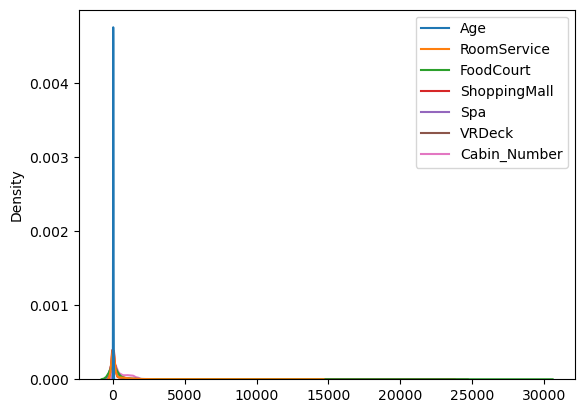

In [25]:
# Before Scaling.
sns.kdeplot(data = train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Number']])

## Scaling:
By experimenting I can say that scaling is not benificial for Decision Tree algorithm.

In [26]:
# # Scaling:
# sc = StandardScaler()
# train_data['Cabin_Number'] = sc.fit_transform(train_data['Cabin_Number'].values.reshape(-1, 1))
# train_data['Age'] = sc.fit_transform(train_data['Age'].values.reshape(-1, 1))
# train_data['RoomService'] = sc.fit_transform(train_data['RoomService'].values.reshape(-1, 1))
# train_data['FoodCourt'] = sc.fit_transform(train_data['FoodCourt'].values.reshape(-1, 1))
# train_data['ShoppingMall'] = sc.fit_transform(train_data['ShoppingMall'].values.reshape(-1, 1))
# train_data['Spa'] = sc.fit_transform(train_data['Spa'].values.reshape(-1, 1))
# train_data['VRDeck'] = sc.fit_transform(train_data['VRDeck'].values.reshape(-1, 1))
# train_data[['Cabin_Number', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

<Axes: ylabel='Density'>

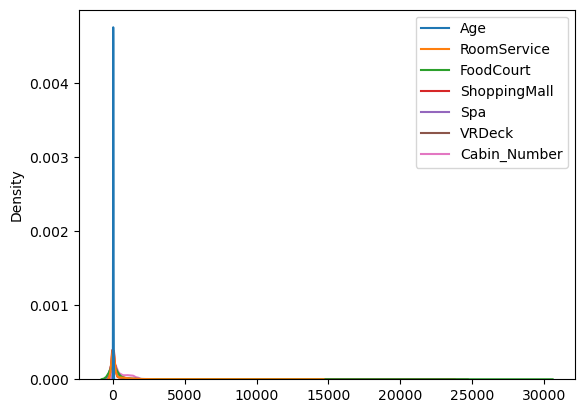

In [27]:
# After Scaling
sns.kdeplot(data = train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Number']])

In [28]:
# Now Split the code into features and targets:
train_data_X = train_data.drop('Transported', axis = 1)
train_data_y = train_data['Transported']

In [29]:
# For this we are using DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 2, criterion='gini')
dtc.fit(train_data_X, train_data_y)

DecisionTreeClassifier(max_depth=2)

In [30]:
dtc.score(train_data_X, train_data_y)

0.718279075117911

## Hyperparameter Tuning using for Decision Tree

In [31]:
param_grid = {'max_depth': range(0, 20)}
grid = GridSearchCV(dtc, param_grid, cv = 5, n_jobs = -1)
grid.fit(train_data_X, train_data_y)
print(f"{grid.best_params_}, Best Score: {grid.best_score_}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'max_depth': 8}, Best Score: 0.756130231056167


## Importing and Processing test data

In [32]:
#Importing test data:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [33]:
# Store the passengerIds
PassengerId = test_data['PassengerId'].values
len(PassengerId)

4277

In [34]:
# Creating a function to pre-process the full data at once:
def process_data(data):
    data.drop(['Name', 'PassengerId'], inplace = True, axis = 1)

    # map the data
    data['HomePlanet'] = data['HomePlanet'].map({'Europa': 1,
                                           'Earth': 2,
                                           'Mars': 3})
    data.Destination = data.Destination.map({'TRAPPIST-1e': 1,
                                                     '55 Cancri e': 2,
                                                     'PSO J318.5-22': 3})

    
    clean_cabins = data['Cabin'].str.split('/', expand = True)
    clean_cabins.columns = ["Deck", "Cabin_Number", "Cabin_Position"]
    data = pd.concat([data, clean_cabins], axis = 1)
    data.drop('Cabin', axis = 1, inplace = True)

    # Dummies
    deck = pd.get_dummies(data.Deck, drop_first=True)
    cabin_position = pd.get_dummies(data.Cabin_Position, drop_first=True)

    data = pd.concat([data, deck, cabin_position], axis = 1)

    # Drop Deck and Cabin_positions
    data.drop(['Deck', 'Cabin_Position'], axis = 1, inplace = True)

    # Now fill the missing values: 
    data['Age'] = data['Age'].fillna(data['Age'].mean())
    data['CryoSleep'] = data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
    data['HomePlanet'] = data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])
    data['Destination'] = data['Destination'].fillna(data['Destination'].mode()[0])
    data['VIP'] = data['VIP'].fillna(data['VIP'].mode()[0])
    data['RoomService'] = data['RoomService'].fillna(data['RoomService'].mean())
    data['FoodCourt'] = data['FoodCourt'].fillna(data['FoodCourt'].mean())
    data['ShoppingMall'] = data['ShoppingMall'].fillna(data['ShoppingMall'].mean())
    data['Spa'] = data['Spa'].fillna(data['Spa'].mean())
    data['VRDeck'] = data['VRDeck'].fillna(data['VRDeck'].mean())
    data['Cabin_Number'] = data['Cabin_Number'].fillna(data['Cabin_Number'].mode()[0])
    data['B'] = data['B'].fillna(data['B'].mode())
    data['C'] = data['C'].fillna(data['C'].mode())
    data['D'] = data['D'].fillna(data['D'].mode())
    data['E'] = data['E'].fillna(data['E'].mode())
    data['F'] = data['F'].fillna(data['F'].mode())
    data['G'] = data['G'].fillna(data['G'].mode())
    data['T'] = data['T'].fillna(data['T'].mode())
    data['S'] = data['S'].fillna(data['S'].mode())

    # Making the feature value int/float type:
    data['Cabin_Number'] = data['Cabin_Number'].astype(int)
    data['RoomService'] = data['RoomService'].astype(int)
    data['FoodCourt'] = data['FoodCourt'].astype(int)
    data['ShoppingMall'] = data['ShoppingMall'].astype(int)
    data['Spa'] = data['Spa'].astype(int)
    data['VRDeck'] = data['VRDeck'].astype(int)

    # Scaling:
# Scaling is not benificial for decision tree problems: If you want, you can uncomment and run it
#     std_sc = StandardScaler()
#     data['Cabin_Number'] = std_sc.fit_transform(data['Cabin_Number'].values.reshape(-1, 1))
#     data['Age'] = std_sc.fit_transform(data['Age'].values.reshape(-1, 1))
#     data['RoomService'] = std_sc.fit_transform(data['RoomService'].values.reshape(-1, 1))
#     data['FoodCourt'] = std_sc.fit_transform(data['FoodCourt'].values.reshape(-1, 1))
#     data['ShoppingMall'] = std_sc.fit_transform(data['ShoppingMall'].values.reshape(-1, 1))
#     data['Spa'] = std_sc.fit_transform(data['Spa'].values.reshape(-1, 1))
#     data['VRDeck'] = std_sc.fit_transform(data['VRDeck'].values.reshape(-1, 1))
    return data

In [35]:
test_data = process_data(test_data)

In [36]:
# predict on the test dataset.
y_prediction = grid.predict(test_data)

In [37]:
# Create a dataframe to submit in the given form:
submission = pd.DataFrame({'PassengerId': PassengerId, 
                          'Transported' : y_prediction})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [38]:
submission.to_csv('/kaggle/working/submission.csv', index = False)
pd.read_csv('/kaggle/working/submission.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
